In [2]:
import tensorflow as tf
tf.keras.datasets.mnist.load_data(path="mnist.npz")
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() #28x28 sized images ranging 0-9

In [3]:
x_train.shape 
# y_train.shape
# x_test.shape
# y_test.shape


(60000, 28, 28)

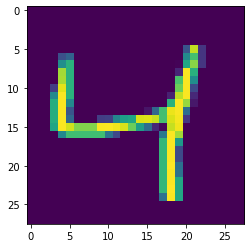

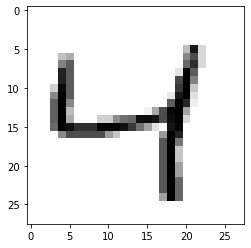

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[2],cmap=plt.cm.binary) #inverted

In [5]:
print(x_train[2]) #bg pixels are 0(before inversion values), only digit pixels >0    

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [6]:
#in order to train, need to normalize 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

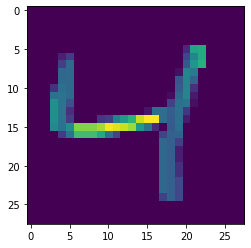

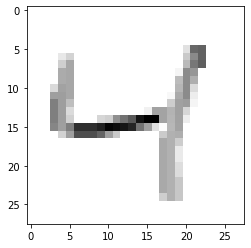

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show() 
plt.imshow(x_train[2],cmap=plt.cm.binary)

In [8]:
print(x_train[2]) #all values normalized to 0-1 because of /255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[2])

4


In [10]:
import numpy as np
IMG_SIZE = 28
#increasing one dimension for kernel operation, resizing to make it suitable for convolution operation//             n+2p-f+1
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #-1 corresponds to 60,000, [60000x28x28x1]
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimension: ",x_trainr.shape)
print("Testing samples dimension: ",x_testr.shape)

Training samples dimension:  (60000, 28, 28, 1)
Testing samples dimension:  (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2

In [12]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(x_trainr)

In [13]:
model = Sequential()

#First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:],kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01))) 
#only for first convolution need to mention
#slicing because (60,000,28,28,1)// we dont need 60000, iterating one by one
model.add(Activation("relu")) 
#activation function- to make it non linear[value<0 drop| value>0 allow to second layer] , 64 kernels/filters of 3x3 size
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling [single max value of 2x2 kernel]

#size becomes 28-3+1=26x26 / n-f+1

#Second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))



#Third Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
#before moving to fully connected layer we need to flatten 2D to 1D | 20x20=400

model.add(Dense(64)) #neural network layer
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layer
model.add(Dense(10)) #must be equal to 10 becaue of the number of classes (0-9)
model.add(Activation(" x")) #activation function noe changed to softmax (class probabilities)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
history=model.fit(datagen.flow(x_trainr,y_train),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 95s 50ms/step - loss: 0.6298 - accuracy: 0.7989
Epoch 2/20
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1347 - accuracy: 0.9636
Epoch 3/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0987 - accuracy: 0.9723
Epoch 4/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0826 - accuracy: 0.9768
Epoch 5/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0707 - accuracy: 0.9806
Epoch 6/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0630 - accuracy: 0.9820
Epoch 7/20
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0571 - accuracy: 0.9840
Epoch 8/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0519 - accuracy: 0.9855
Epoch 9/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0449 - accuracy: 0.9874
Epoch 10/20
1875/1875 [==============================] - 66s 35m

In [16]:
print(min(history.history['accuracy']))

print(max(history.history['accuracy']))

0.9052500128746033
0.9933833479881287


In [18]:
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples: ",test_loss)
print("Validation accuracy on 10,000 test samples: ",test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0502 - accuracy: 0.9882
Test loss on 10,000 test samples:  0.05015218257904053
Validation accuracy on 10,000 test samples:  0.9882000088691711


In [19]:
prediction = model.predict([x_testr])

In [20]:
print(prediction)

[[2.52116820e-07 5.41299687e-06 2.73736514e-05 ... 9.99945998e-01
  2.82350697e-07 1.23176860e-05]
 [1.28619581e-06 1.09638040e-06 9.99996305e-01 ... 1.10046994e-08
  1.05206857e-06 2.33449882e-08]
 [1.06640483e-08 9.99998450e-01 5.35030047e-08 ... 1.35633769e-07
  6.82879943e-07 1.24051978e-08]
 ...
 [7.11699867e-15 7.01909711e-12 1.07613774e-13 ... 1.03448938e-09
  1.36183265e-09 8.09855720e-08]
 [1.87766491e-12 4.25904049e-13 1.17642549e-12 ... 3.91728615e-13
  1.97285233e-09 2.13790955e-07]
 [6.09230497e-08 5.43251444e-09 3.21273341e-09 ... 2.42207144e-12
  1.41582404e-07 4.84363527e-09]]


PREDICTION:  9 IMAGE NAME:  colour/9rotate.png
PREDICTION:  4 IMAGE NAME:  colour/4rotate.png
PREDICTION:  0 IMAGE NAME:  colour/8hand.jpeg
PREDICTION:  4 IMAGE NAME:  colour/4-color.png
PREDICTION:  9 IMAGE NAME:  colour/9color.png
PREDICTION:  3 IMAGE NAME:  colour/3-color.png
PREDICTION:  2 IMAGE NAME:  colour/2scan.jpeg
PREDICTION:  9 IMAGE NAME:  colour/9color (1).png
PREDICTION:  7 IMAGE NAME:  colour/7color.png
PREDICTION:  9 IMAGE NAME:  colour/6rotate.png
PREDICTION:  9 IMAGE NAME:  colour/9rotate1.png
PREDICTION:  7 IMAGE NAME:  colour/7color (1).png
PREDICTION:  5 IMAGE NAME:  colour/5rule.jpeg


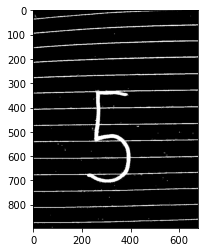

In [21]:
#COLOUR
import matplotlib.pyplot as plt
from skimage import io
import cv2
from skimage import util
import os


for filename in os.listdir('colour'):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"): 
        
        pass
    else:
        continue
    name="colour/"
    name+=filename
    i=name





    img = cv2.imread(i)
    # plt.imshow(img) #ORIGINAL IMAGE
    img1 = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    average = img1.mean(axis=0).mean(axis=0)
#     print(average)
    # plt.imshow(img1) GRAYSCALED READ IMAGE
    thresh = average
    img_binary = cv2.threshold(img1, thresh, 255, cv2.THRESH_BINARY)[1]

    cv2.imwrite('test_colour/test_c.png',img_binary) 

    img2=cv2.imread('test_colour/test_c.png')
    # plt.imshow(img2) #BLACK AND WHITE
    # print(img2)
    unique_elements, counts_elements = np.unique(img2, return_counts=True)
#     print("Frequency of unique values of the said array:")
#     print(np.asarray((unique_elements, counts_elements)))
    d=dict(zip(unique_elements, counts_elements))
#     print(d)

    if(d[0]<d[255]):
        img2 = util.invert(img2)
    #     print(img2)
    cv2.imwrite('test_colour/test_c.png',img2) 
   


    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    resized2 = cv2.resize(gray2, (28,28),interpolation = cv2.INTER_AREA)  
    newimg2 = tf.keras.utils.normalize(resized2, axis=1)

    newimg2 = np.array(newimg2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    predictions2 = model.predict(newimg2)
#     plt.subplot(1,15,images.index(i)+1)
    t="test_colour/"
    t+=filename
    cv2.imwrite(t,img2) 
    plt.imshow(img2)

    print("PREDICTION: ",np.argmax(predictions2),"IMAGE NAME: ",i)
    
    # plt.imshow(resized2) #FINAL IMAGE





PREDICTION:  8 IMAGE NAME:  bw/8.png
PREDICTION:  9 IMAGE NAME:  bw/9.png
PREDICTION:  6 IMAGE NAME:  bw/4.png
PREDICTION:  5 IMAGE NAME:  bw/5.png
PREDICTION:  7 IMAGE NAME:  bw/7.png
PREDICTION:  6 IMAGE NAME:  bw/6.png
PREDICTION:  2 IMAGE NAME:  bw/2.png
PREDICTION:  3 IMAGE NAME:  bw/3.png
PREDICTION:  1 IMAGE NAME:  bw/1.png
PREDICTION:  0 IMAGE NAME:  bw/0.png


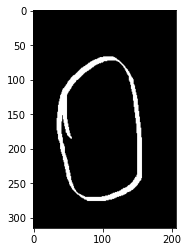

In [22]:
#BW
import matplotlib.pyplot as plt
from skimage import io
import cv2
from skimage import util
import os


for filename in os.listdir('bw'):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"): 
        
        pass
    else:
        continue
    name="bw/"
    name+=filename
    i=name





    img = cv2.imread(i)
    # plt.imshow(img) #ORIGINAL IMAGE
    img1 = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    average = img1.mean(axis=0).mean(axis=0)
#     print(average)
    # plt.imshow(img1) GRAYSCALED READ IMAGE
    thresh = average
    img_binary = cv2.threshold(img1, thresh, 255, cv2.THRESH_BINARY)[1]

    cv2.imwrite('test_bw/test_b.png',img_binary) 

    img2=cv2.imread('test_bw/test_b.png')
    # plt.imshow(img2) #BLACK AND WHITE
    # print(img2)
    unique_elements, counts_elements = np.unique(img2, return_counts=True)
#     print("Frequency of unique values of the said array:")
#     print(np.asarray((unique_elements, counts_elements)))
    d=dict(zip(unique_elements, counts_elements))
#     print(d)

    if(d[0]<d[255]):
        img2 = util.invert(img2)
    #     print(img2)
    cv2.imwrite('test_bw/test_b.png',img2) 
   


    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    resized2 = cv2.resize(gray2, (28,28),interpolation = cv2.INTER_AREA)  
    newimg2 = tf.keras.utils.normalize(resized2, axis=1)

    newimg2 = np.array(newimg2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    predictions2 = model.predict(newimg2)
#     plt.subplot(1,15,images.index(i)+1)
    t="test_bw/"
    t+=filename
    cv2.imwrite(t,img2) 
    plt.imshow(img2)

    print("PREDICTION: ",np.argmax(predictions2),"IMAGE NAME: ",i)
    
    # plt.imshow(resized2) #FINAL IMAGE


